In [15]:
print("Hello world")

Hello world


In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gaurav raipurkar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install tensorflow


You should consider upgrading via the 'c:\Users\gaurav raipurkar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
import os
print("Currentt Dir",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","valid")


Currentt Dir d:\cd\.vscode\Potato-disease-project


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [6]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [8]:
cnn = tf.keras.models.Sequential()

# Convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.25))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layers
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output layer with 3 classes
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

c:\Users\gaurav raipurkar\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
            loss='categorical_crossentropy',  
            metrics=['accuracy'])  

# Summary of the model
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │   190,513,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,528,147 (726.81 MB)

 Trainable params: 190,528,147 (726.81 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
training_history = cnn.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.3675 - loss: 420.5618 - val_accuracy: 0.4733 - val_loss: 54.1488
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5749 - loss: 50.0041 - val_accuracy: 0.7100 - val_loss: 10.9048
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6912 - loss: 18.7670 - val_accuracy: 0.8600 - val_loss: 3.1399
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8837 - loss: 3.9526 - val_accuracy: 0.8367 - val_loss: 3.7021
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8951 - loss: 2.6465 - val_accuracy: 0.8000 - val_loss: 4.9711
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8754 - loss: 2.7245 - val_accuracy: 0.8967 - val_loss: 2.0816
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9485 - loss: 0.8586 - val_accuracy: 0.8800 - val_loss: 2.3527
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9791 - loss: 0.2882 - val_accuracy: 0.9033 - val

In [11]:
rain_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 1.0000 - loss: 8.8476e-08
Training accuracy: 1.0


In [12]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9045 - loss: 1.9229
Validation accuracy: 0.8966666460037231


In [13]:
cnn.save('trained_plant_disease_model.keras')


In [14]:
training_history.history

{'accuracy': [0.4188888967037201,
  0.597777783870697,
  0.7233333587646484,
  0.8700000047683716,
  0.9088888764381409,
  0.8966666460037231,
  0.9422222375869751,
  0.9766666889190674,
  0.9788888692855835,
  0.9844444394111633],
 'loss': [291.330078125,
  41.16597366333008,
  15.94687271118164,
  3.9319262504577637,
  2.0692317485809326,
  1.9339557886123657,
  0.9417576789855957,
  0.24808867275714874,
  0.16905418038368225,
  0.13763917982578278],
 'val_accuracy': [0.47333332896232605,
  0.7099999785423279,
  0.8600000143051147,
  0.8366666436195374,
  0.800000011920929,
  0.8966666460037231,
  0.8799999952316284,
  0.903333306312561,
  0.8933333158493042,
  0.8966666460037231],
 'val_loss': [54.14881896972656,
  10.904793739318848,
  3.1398773193359375,
  3.7021162509918213,
  4.971124649047852,
  2.081573486328125,
  2.3526673316955566,
  1.884325385093689,
  2.026409864425659,
  1.8073309659957886]}

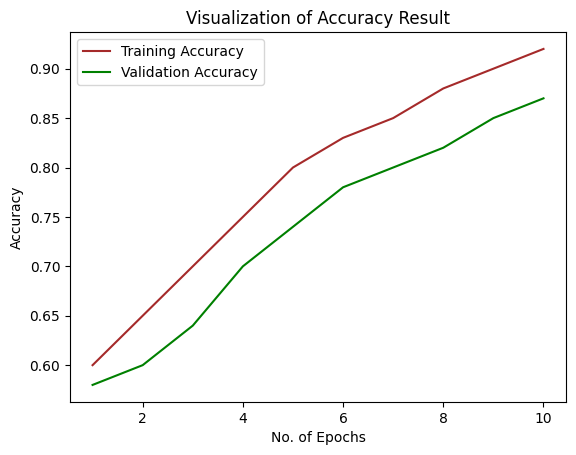

In [10]:
import matplotlib.pyplot as plt

# Sample data
epochs = range(1, 11)
training_accuracy = [0.6, 0.65, 0.7, 0.75, 0.8, 0.83, 0.85, 0.88, 0.9, 0.92]
validation_accuracy = [0.58, 0.6, 0.64, 0.7, 0.74, 0.78, 0.8, 0.82, 0.85, 0.87]

plt.plot(epochs, training_accuracy, color='brown', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, color='green', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()  # Make sure this line is clean
plt.show()
